In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt

from utils import load_images, visualize_scatter

In [3]:
RANDOM_STATE = 42

In [4]:
class_labels = ['Non','VeryMild', 'Mild', 'Moderate']

idx2label = {i: name for i, name in enumerate(class_labels)}

In [5]:
# load images
synth_images, synth_labels_idx = load_images('data/SyntheticDataset', verbose=False)
real_images, real_labels_idx = load_images('data/RealDataset', verbose=False)

In [6]:
# flatten images
synth_images = synth_images.reshape(synth_images.shape[0], -1)
real_images = real_images.reshape(real_images.shape[0], -1)

In [7]:
# scale images
synth_images_scaled = MinMaxScaler().fit_transform(synth_images)
real_images_scaled = MinMaxScaler().fit_transform(real_images)

### synthetic images

In [8]:
# PCA + t-SNE
pca = PCA(n_components=180, random_state=RANDOM_STATE)
tsne = TSNE(n_components=2, random_state=RANDOM_STATE)

synth_images_scaled_pca = pca.fit_transform(synth_images_scaled)
synth_images_scaled_tsne = tsne.fit_transform(synth_images_scaled_pca)
synth_images_scaled_tsne_scaled = StandardScaler().fit_transform(synth_images_scaled_tsne)

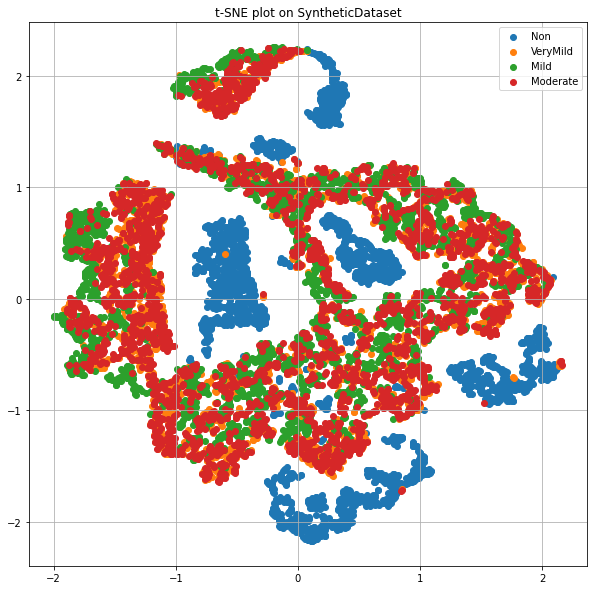

In [9]:
visualize_scatter(
    data_2d=synth_images_scaled_tsne_scaled,
    labels_idx=synth_labels_idx,
    idx2label=idx2label,
    title=f't-SNE plot on SyntheticDataset',
);

### real images

In [10]:
# PCA + t-SNE
pca = PCA(n_components=180, random_state=RANDOM_STATE)
tsne = TSNE(n_components=2, random_state=RANDOM_STATE)

real_images_scaled_pca = pca.fit_transform(real_images_scaled)
real_images_scaled_tsne = tsne.fit_transform(real_images_scaled_pca)
real_images_scaled_tsne_scaled = StandardScaler().fit_transform(real_images_scaled_tsne)

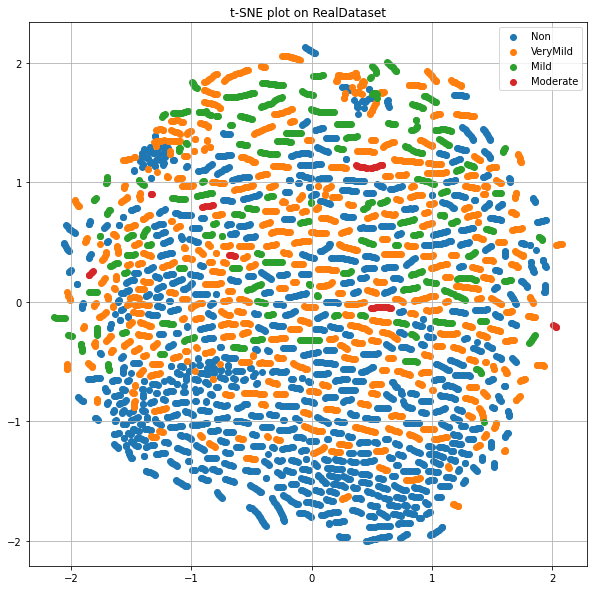

In [11]:
visualize_scatter(
    data_2d=real_images_scaled_tsne_scaled,
    labels_idx=real_labels_idx,
    idx2label=idx2label,
    title=f't-SNE plot on RealDataset',
);